Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Information:
Number of samples: 150
Number of features (excluding target): 4

Feature Types:
- sepal length (cm): numeric (float)
- sepal width (cm): numeric (float)
- petal length (cm): numeric (float)
- petal width (cm): numeric (float)
- species: nominal (categorical)

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean  

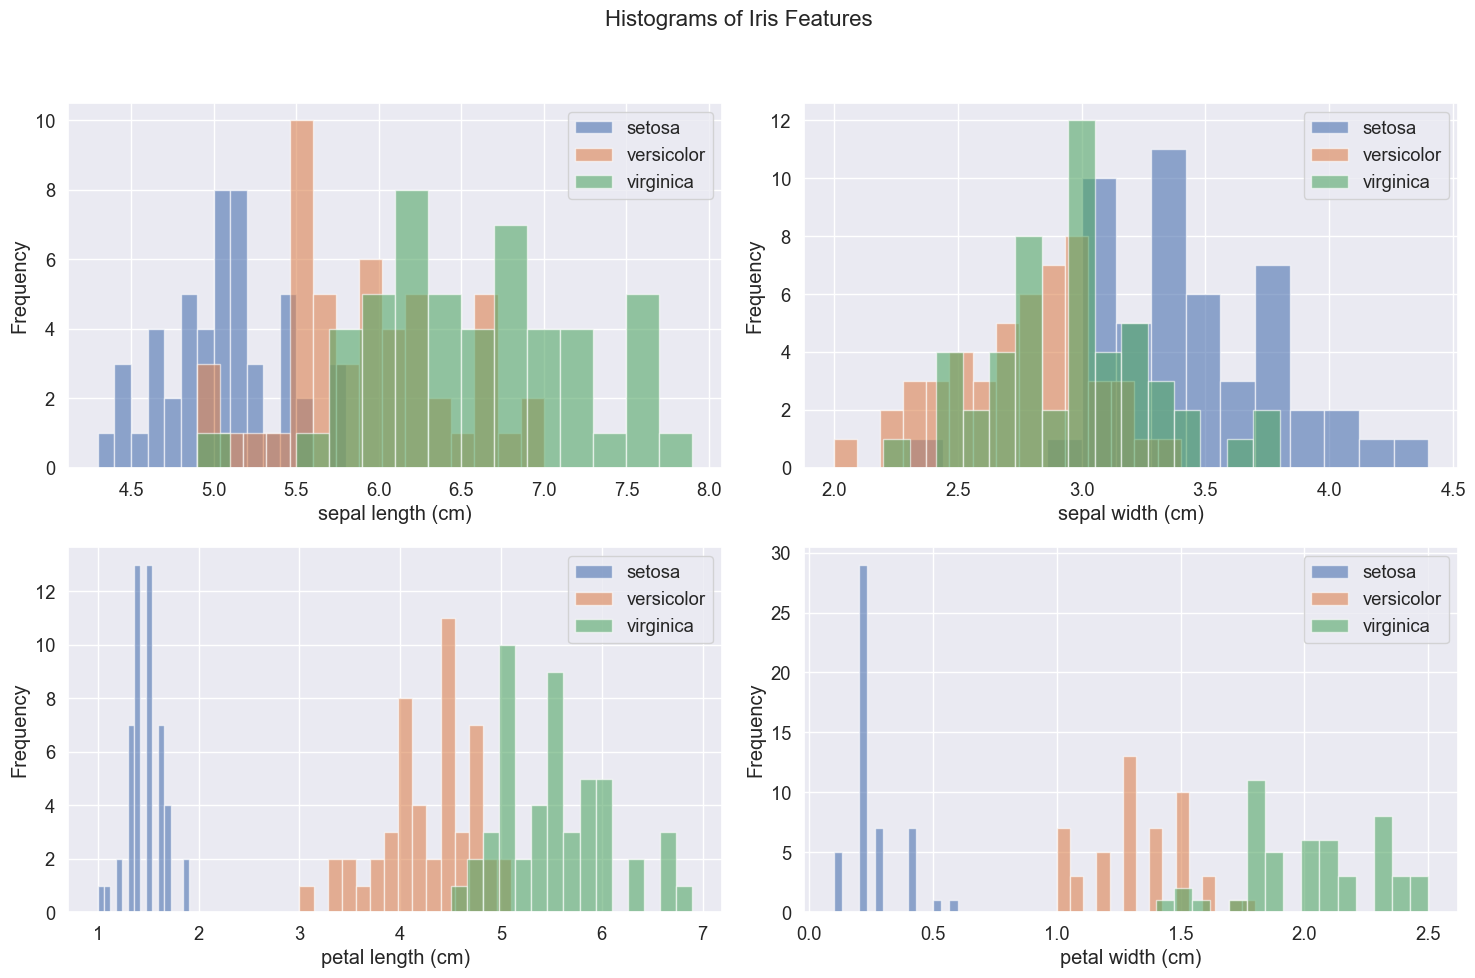

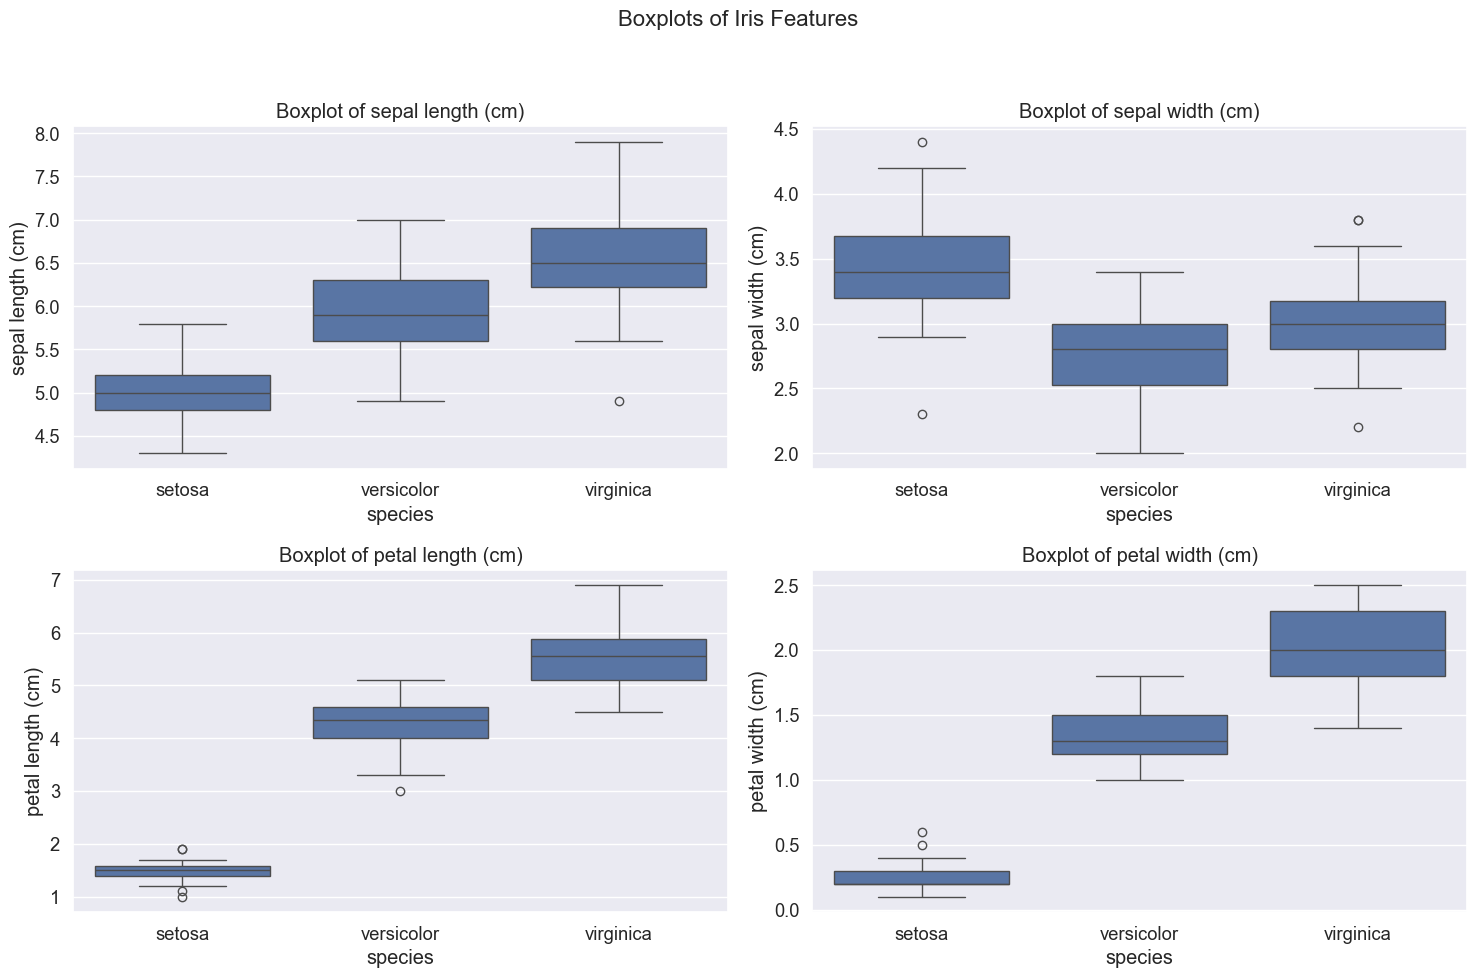

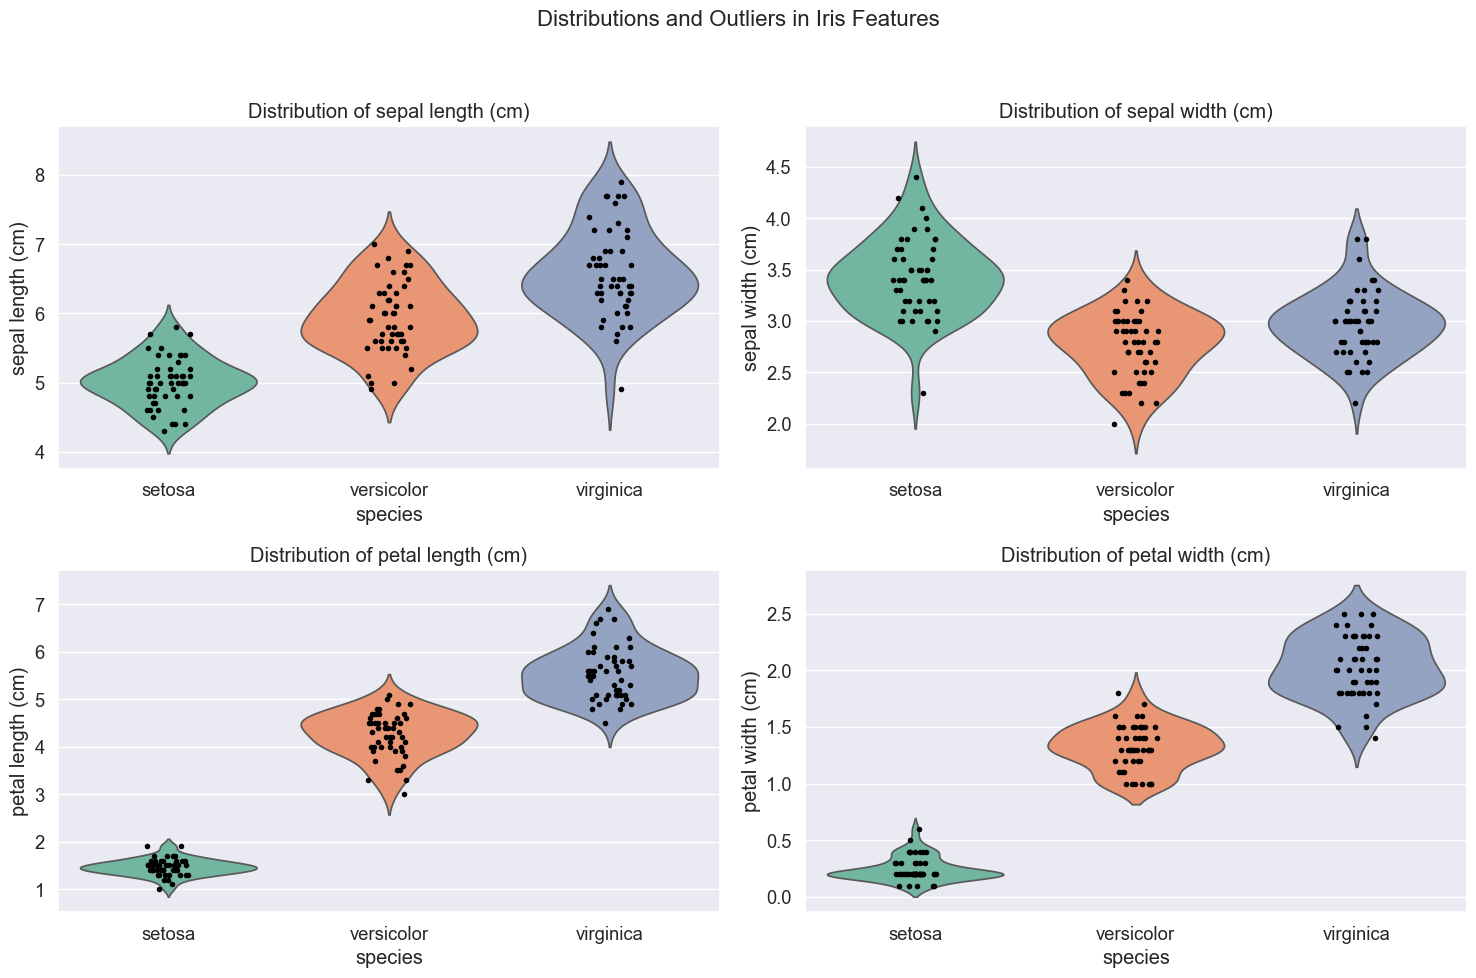


Outlier Detection using Z-scores:

Number of outliers per feature (z-score > 3):
sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     0
dtype: int64

Outliers in sepal width (cm):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   

   species  
15  setosa  


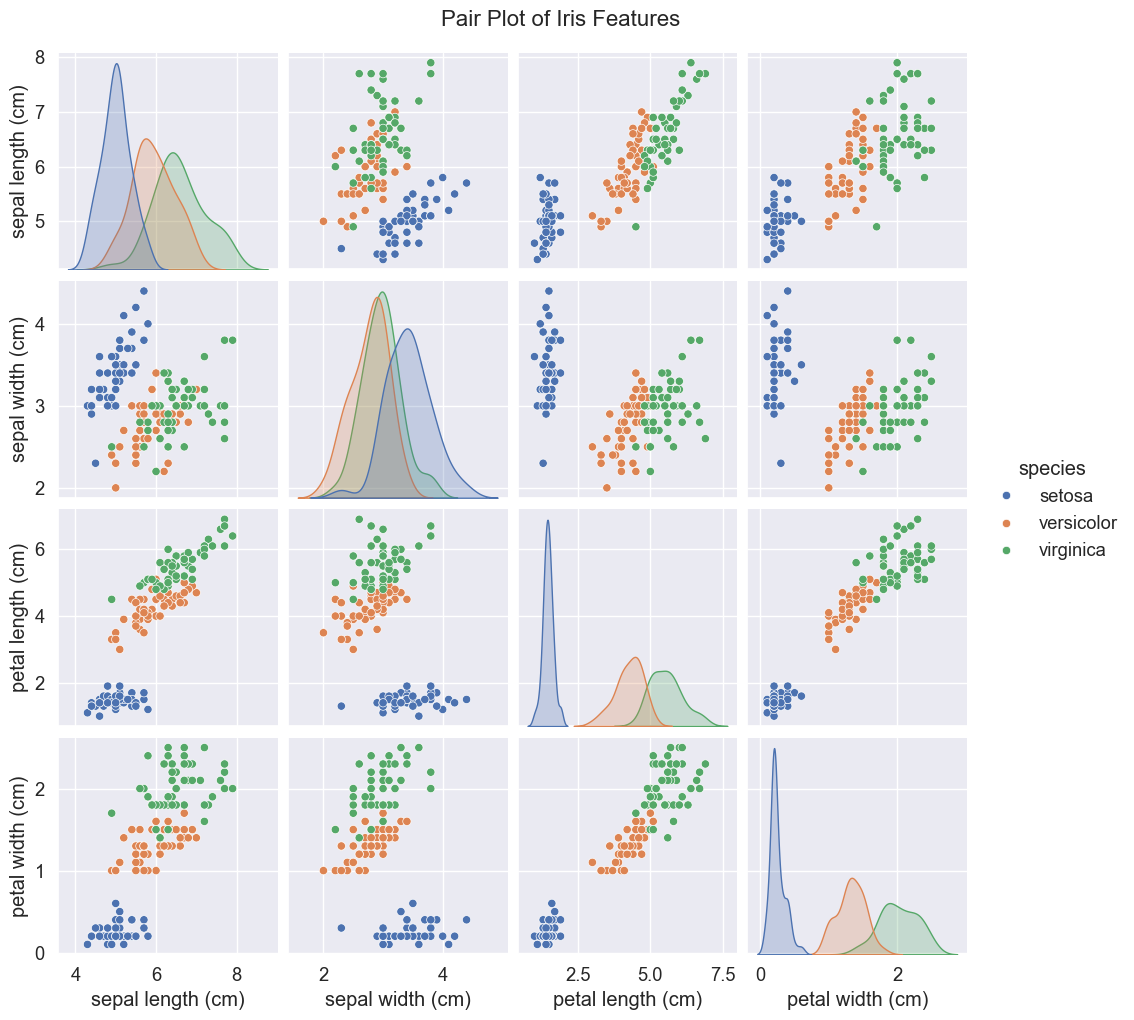

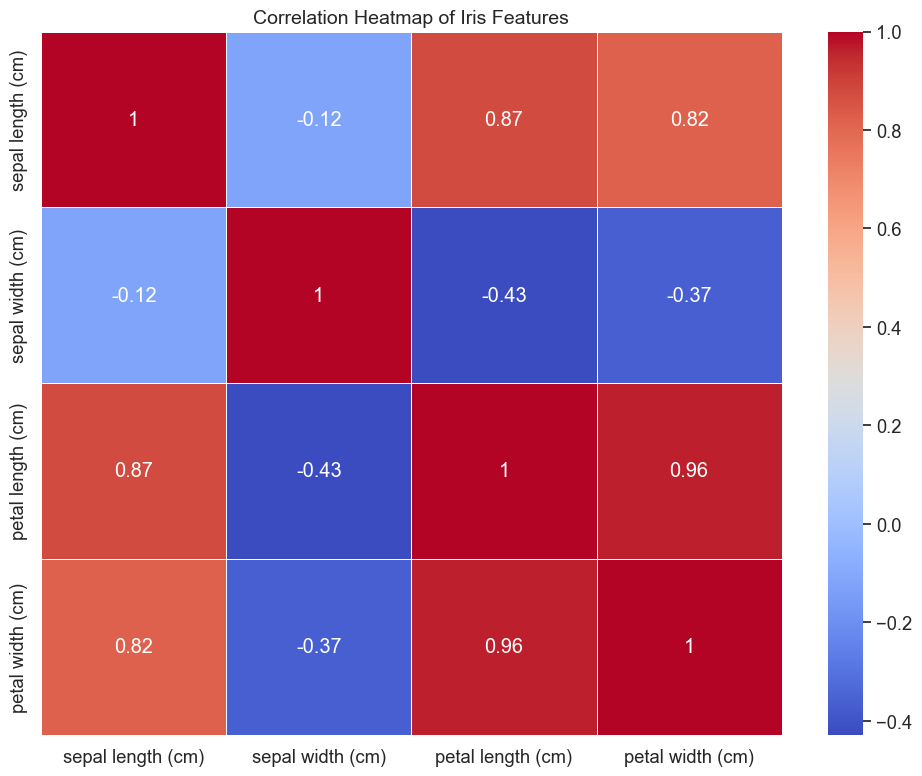

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Set styles
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 1. List down the features and their types
print("Dataset Preview:")
print(df.head())

print("\nDataset Information:")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features (excluding target): {df.shape[1] - 1}")

print("\nFeature Types:")
for feature in iris.feature_names:
    print(f"- {feature}: numeric (float)")
print("- species: nominal (categorical)")

print("\nBasic Statistics:")
print(df.describe())

print("\nFeature Distributions by Species:")
print(df.groupby('species').agg(['mean', 'std', 'min', 'max']))

# 2. Create histograms for each feature
plt.figure(figsize=(15, 10))
plt.suptitle("Histograms of Iris Features", fontsize=16)

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in df['species'].unique():
        plt.hist(df[df['species'] == species][feature], alpha=0.6, bins=15, label=species)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 3. Create boxplots for each feature
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplots of Iris Features", fontsize=16)

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 4. Compare distributions and identify outliers
plt.figure(figsize=(15, 10))
plt.suptitle("Distributions and Outliers in Iris Features", fontsize=16)

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=df, inner=None, palette='Set2')
    sns.stripplot(x='species', y=feature, data=df, size=4, jitter=True, color='black')
    plt.title(f'Distribution of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Outlier detection using Z-score
print("\nOutlier Detection using Z-scores:")
z_scores = pd.DataFrame()

for feature in iris.feature_names:
    z_scores[feature] = np.abs((df[feature] - df[feature].mean()) / df[feature].std())

outliers = z_scores > 3
outlier_count = outliers.sum()
print("\nNumber of outliers per feature (z-score > 3):")
print(outlier_count)

# Show details of outliers if any
for feature in iris.feature_names:
    if outlier_count[feature] > 0:
        print(f"\nOutliers in {feature}:")
        print(df[outliers[feature]])

# Extra: Pair plot
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle("Pair Plot of Iris Features", fontsize=16, y=1.02)
plt.show()

# Extra: Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.drop('species', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Features', fontsize=14)
plt.tight_layout()
plt.show()
